In [ ]:
!git clone https://github.com/stockmanager1/Diviner-Nonstationary-time-series-forecasting.git

Cloning into 'Diviner-Nonstationary-time-series-forecasting'...
remote: Enumerating objects: 292, done.
remote: Counting objects: 100% (292/292), done.
remote: Compressing objects: 100% (216/216), done.
remote: Total 292 (delta 143), reused 180 (delta 64), pack-reused 0
Receiving objects: 100% (292/292), 34.51 MiB | 12.48 MiB/s, done.
Resolving deltas: 100% (143/143), done.


In [ ]:
!pip install -r /content/Diviner-Nonstationary-time-series-forecasting/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 115.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0+cu118
    Uninstalling torch-2.1.0+cu118:
      Successfully uninstalled torch-2.1.0+cu118
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resol

In [ ]:
!git clone https://github.com/CapricornGuang/NetworkForecast.git

Cloning into 'NetworkForecast'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (199/199), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 199 (delta 74), reused 182 (delta 64), pack-reused 0
Receiving objects: 100% (199/199), 34.50 MiB | 15.92 MiB/s, done.
Resolving deltas: 100% (74/74), done.


In [ ]:
!mv /content/Diviner-Nonstationary-time-series-forecasting/* /content/

In [ ]:
#Traing <Diviner model> on ETTh1 dataset from scratch.
!python -u main.py --model=diviner --data=ETTh1 --predict_length=336 --enc_seq_len=30 --out_seq_len=14 --dec_seq_len=14 --dim_val=24 --dim_attn=12 --dim_attn_channel=48 --n_heads=6 --n_encoder_layers=3 --n_decoder_layers=2 --batch_size=32 --train_epochs=10 --use_gpu --smo_loss --dynamic --early_stop --shuffle --verbose --out_scale


Args in experiment:
Namespace(model='diviner', ddblock=True, sc=True, self_masked=True, data='ETTh1', predict_length=336, root_path='./data/ETT/', data_path='ETTh1.csv', split_ratio1=[0, 0.7, 0.8], split_ratio2=[0.7, 0.8, 1.0], features=['OT'], target='OT', pattern_length=24, out_scale=True, enc_seq_len=30, out_seq_len=14, dec_seq_len=14, dim_input=24, dim_output=24, dim_val=24, dim_attn=12, dim_attn_channel=48, n_heads=6, n_encoder_layers=3, n_decoder_layers=2, conv_out={'use': True, 'kernel': 5, 'layers': 3}, test=False, check_points='./checkpoints', load_check_points='', verbose=True, early_stop=True, patience=7, delta=0.0, batch_size=32, train_epochs=10, shuffle=True, num_workers=0, drop_last=False, optimizer='AdamW', lr=0.001, loss='mse', smo_loss=True, dynamic=True, dynamic_ratio=0.8, use_gpu=True, gpu_id=0, use_multi_gpu=False, devices='0,1,2,3', device_ids=0)
Use GPU: cuda:0
start building network...
network parameters:
        dim_val:24,dim_attn:12,dim_input:24,dim_output:24,

In [ ]:
import numpy as np

# .npy 파일 불러오기
predictions = np.load('/content/predict_values.npy',allow_pickle=True)

# 배열 내용 확인
print(predictions)


[[ 9.791719   6.150605   2.7856715 ...  8.973848  10.779292  11.668785 ]]


In [ ]:
predictions.shape

(1, 3360)

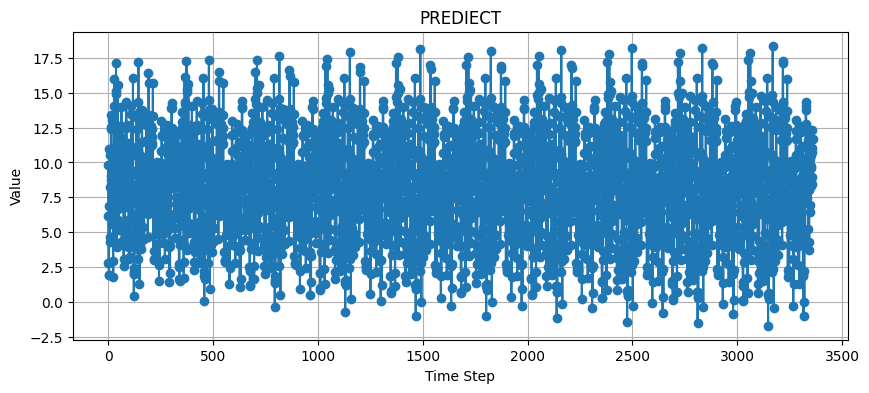

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(predictions[0], marker='o', linestyle='-')
#plt.axhline(y=0, color='r', linestyle='--', label='Threshold')  # y=0 위치에 빨간색 점선을 추가합니다.
plt.title('PREDIECT')
plt.xlabel('Time Step')
#plt.yticks([])  # Y축 눈금 라벨을 제거합니다.
plt.ylabel('Value')
#plt.legend()  # 범례를 추가합니다.
plt.grid(True)
plt.show()


In [ ]:
#Testing <Diviner model> on ETTh1 dataset from scratch.
!python -u main.py --model=diviner --data=ETTh1 --predict_length=336 --enc_seq_len=30 --out_seq_len=14 --dec_seq_len=14 --dim_val=24 --dim_attn=12 --dim_attn_channel=48 --n_heads=6 --n_encoder_layers=3 --n_decoder_layers=2 --batch_size=32 --train_epochs=100 --use_gpu --smo_loss --dynamic --early_stop --shuffle --verbose --out_scale --test --load_check_points=/content/checkpoints/ETTh1/336/checkpoints_dimVal24_dimInput24_encSeqLen30_decSeqLen14_outSeqLen14_encoderLayers3_decoderLayers2_nheads6_scTrue_ddblockTrue_selfMaskedTrue.ckpt

Args in experiment:
Namespace(model='diviner', ddblock=True, sc=True, self_masked=True, data='ETTh1', predict_length=336, root_path='./data/ETT/', data_path='ETTh1.csv', split_ratio1=[0, 0.7, 0.8], split_ratio2=[0.7, 0.8, 1.0], features=['OT'], target='OT', pattern_length=24, out_scale=True, enc_seq_len=30, out_seq_len=14, dec_seq_len=14, dim_input=24, dim_output=24, dim_val=24, dim_attn=12, dim_attn_channel=48, n_heads=6, n_encoder_layers=3, n_decoder_layers=2, conv_out={'use': True, 'kernel': 5, 'layers': 3}, test=True, check_points='./checkpoints', load_check_points='/content/checkpoints/ETTh1/336/checkpoints_dimVal24_dimInput24_encSeqLen30_decSeqLen14_outSeqLen14_encoderLayers3_decoderLayers2_nheads6_scTrue_ddblockTrue_selfMaskedTrue.ckpt', verbose=True, early_stop=True, patience=7, delta=0.0, batch_size=32, train_epochs=100, shuffle=True, num_workers=0, drop_last=False, optimizer='AdamW', lr=0.001, loss='mse', smo_loss=True, dynamic=True, dynamic_ratio=0.8, use_gpu=True, gpu_id=0,